In [42]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup

In [43]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [44]:
five_orderings = orders.n_alternating_c5_orders(16,n = 2)

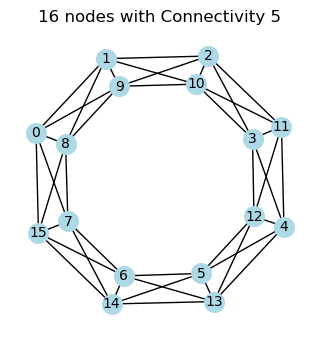

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# The data containing two arrays
data = orders.n_alternating_c5_orders(16,n = 2)
# data = orders.n_random_line_orders(16,n = 1000,chunk_sizes = [4,4,4,4])

# Iterate through the data arrays
for array in data:
    # For each group in the array
    for group in array:
        # Create edges between nodes in the same group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j])

# Plot the graph
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.title("16 nodes with Connectivity 5")
plt.show()


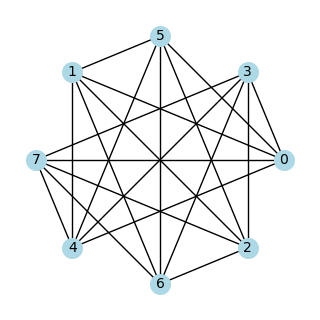

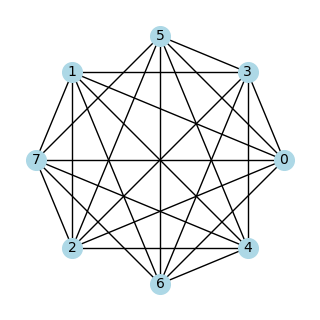

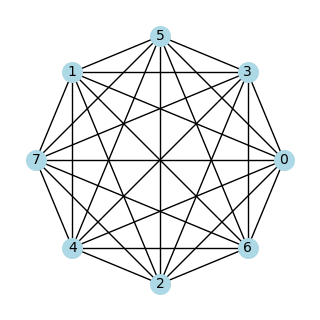

In [96]:
def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    for node in range(n):
        for m in s:
            G.add_edge(node,(node+m)%n)
    return(G)

g = cay(8,[3,5,1,7,4])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay(8,[3,5,1,7,2,6])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay(8,[3,5,1,7,4,2,6])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)

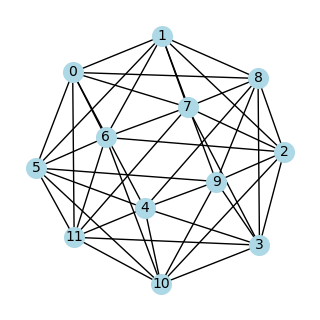

In [154]:

g = cay(12,[1,11,5,7,4,8,6])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()




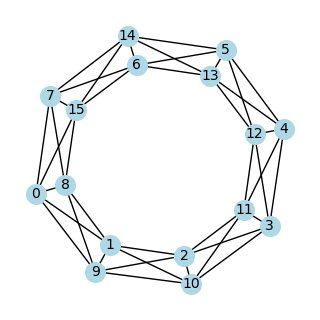

In [126]:
g = cay(16,[1,9,8,7,15])
# g = cay(16,[1,15,2,14,8])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()